In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder

In [100]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [102]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [103]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [104]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [105]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [106]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [108]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [109]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [110]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [111]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [112]:
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [113]:
smote = SMOTETomek(0.90)
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [114]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    367
0    324
Name: Loan_Status, dtype: int64


In [115]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)

In [116]:
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.756735,0.571223,-1.197121,-0.679563,0.613591,-0.316731,0.136187,-0.564433,-0.297224,0.281469,0.613591,1.352931
1,-1.751009,0.571223,0.835337,0.380433,0.613591,-0.316731,-0.085989,-0.073627,-0.198908,0.281469,0.613591,-1.215408
2,-1.745283,0.571223,0.835337,-0.679563,0.613591,3.157254,-0.363797,-0.564433,-0.960857,0.281469,0.613591,1.352931
3,-1.739557,0.571223,0.835337,-0.679563,-1.629750,-0.316731,-0.436978,0.203022,-0.297224,0.281469,0.613591,1.352931
4,-1.733832,0.571223,-1.197121,-0.679563,0.613591,-0.316731,0.162687,-0.564433,-0.039145,0.281469,0.613591,1.352931


# Splitting Data Into Train And Test

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 30)

In [118]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(483, 12)
(483,)
(208, 12)
(208,)


## Model

In [119]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [120]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [121]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.7692307692307693
Training accuracy:  0.8592132505175983


In [122]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,66,32
1,16,94


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        98
           1       0.75      0.85      0.80       110

    accuracy                           0.77       208
   macro avg       0.78      0.76      0.76       208
weighted avg       0.77      0.77      0.77       208



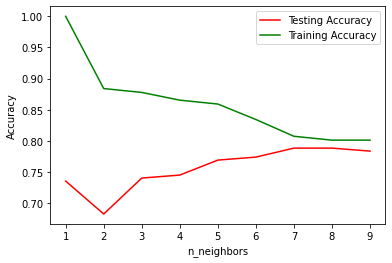

In [124]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color ='red')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color ='green')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()